# Libs 

In [9]:
import pandas as pd 
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.base import BaseEstimator


# MNST Dataset

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


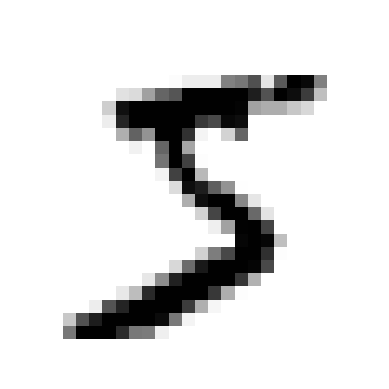

In [4]:
some_digit = X.iloc[0:1,:]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
y = y.astype(np.uint8)


In [6]:
# Split the dataset for further exploration 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
X[:1]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training a binary classifier

In [8]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [12]:
# SGDClassifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)


In [ ]:
sgd_clf.fit(X_train, y_train_5)

In [11]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X.iloc[0:1,:]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
sgd_clf.predict(some_digit)

array([ True])

# Performance Mesures

## Measuring Accuracy using Cross-Validation 

- StratifiedKFold cria particoes com proporcões equivalentes de classes (variavel resposta)

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)  

In [15]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    print(train_index.shape, test_index.shape) # apresenta o indice relativo ao treino e teste do cross val 

    clone_clf = clone(sgd_clf)

    # em cada iteraçã do for, um conjunto de treino (40k linhas) e teste (20k linhas) será separado a partir do dataset de treino (60k linhas)
    X_train_folds = X_train.iloc[train_index]
    y_train_fold = y_train_5.iloc[train_index]
    X_test_folds = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds,y_train_fold)
    y_pred = clone_clf.predict(X_test_folds)
    n_corrects = sum(y_pred == y_test_fold)
    print(n_corrects/len(y_pred))
    print("---------------------")


(40000,) (20000,)
0.9669
---------------------
(40000,) (20000,)
0.91625
---------------------
(40000,) (20000,)
0.96785
---------------------


- usando o metodo cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score


cross_val_score(sgd_clf, X_train, y_train_5,cv =3,  scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator): 
    def fit(self, X, y=None):
        pass

    def predict(self, X): 
        return np.zeros((len(X), 1), dtype=bool)


- um estimador burro chega em acuracias bem altas porque o dataset é muito "skewed", ou seja, suas classes nao estão bem equilibradas entre si

In [18]:
clf_never5 = Never5Classifier()
cross_val_score(clf_never5, X_train, y_train_5, cv =3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [20]:
y_train_pred

array([ True, False, False, ...,  True, False, False], shape=(60000,))

- na matriz de confusao podemos verificar 
    - as predições corretas (eram True/False e foram preditas como True/False)
    - Falso positivos: preditos como True mas eram False
    - Falso negativo: nao predito como True mas era True
- Linhas -  Classe real
- Colunas - Classe predita
-----------
- 53892 eram True e foram preditas como True
- 3530 eram False e foram preditas como False
- 1891 eram False mas foram preditas como True (falso positivo)
- 687 eram True, mas foram preditas como False (falso negativo)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

## Precision e Recall 

#### Precision

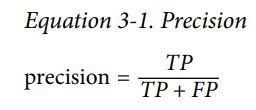

- É a taxa de acerto de positivos em relacao a todas as predicoes positivas

#### Recall

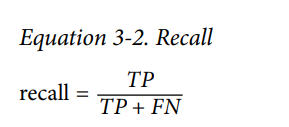
- É a taxa de acertos de positivos em relacao a todos os positivos
- True positive rate
- Sensitiivity

#### Implementacao no sklearn

- 83% das predicoes positivas foram corretas
- 65% das classes positivas foram capturadas pelo modelo

In [ ]:
from sklearn.metrics import precision_score, recall_score 


precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [23]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

### F1

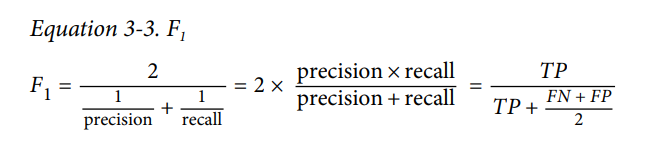
- media harmonica entre precision e recall
    - a media harmonica da um peso maior para valores menores, em comparacao com a media simples
    - assim, apenas se ambas metricas forem altas é que F1 será alto tambem
- F1 favorece valores similares de recall e precision, o que pode nao ser o desejado 
    - em alguns cenarios, uma alta precision é esperada, por exemplo, na detecção de videos seguros para crianças. Ainda que alguns videos OK nao passem, com uma alta precisao, uma alta porcentagem daqueles tageados como "seguros" será de fato seguro (seguro real/seguro predito [inclui os TP e FP])


#### Implementacao no sklearn


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

## Precision x Recall - Tradeoff

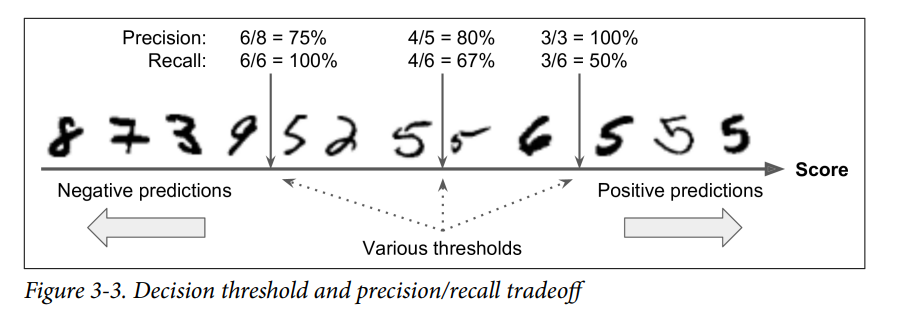
- Dado uma serie de scores, é definido um limiar, acima do qual é feito a classificacao de cada instancia. 
- Em outras palavras, imagine que vou classificar alunos em bons/ruins com base na media final de cada um. Se eu subir muito a barra, para por exemplo 8, certamente obterei uma alta precisao (TP/TP+FP), significando que aqueles que eu prediz como bons são realmente bons. Porem um aluno que é bom mas ficou um pouco abaixo de 8 será classificado como ruim, o que impacta minha recall (TP/TP+FN)

In [ ]:
y_scores = sgd_clf.decision_function(some_digit)
threshold = 0 #Esse é o threshold padrao do SGDClassifier, porem aqui é possivel parametrizar


In [32]:

y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([ True])

- No exemplo abaixo, aumentando o threshold houve uma piora no recall: nem todos verdadeiros positivos são capturados, em busca de uma alta precisao


In [34]:
# Aumentando o threshold para 8000 
threshold = 8000
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([False])

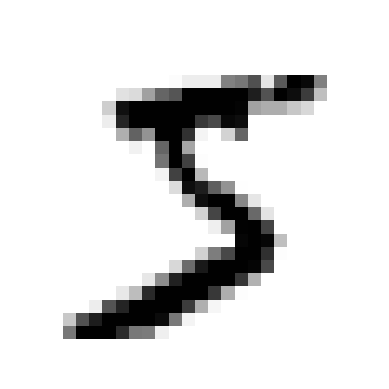

In [35]:
some_digit = X.iloc[0:1,:]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

### Como escolher um threshold adequado

In [40]:
# em vez da predicao, ele retorna o score
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

##### Calculando precision-recall para todos thresholds

In [ ]:
from sklearn.metrics import precision_recall_curve


precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

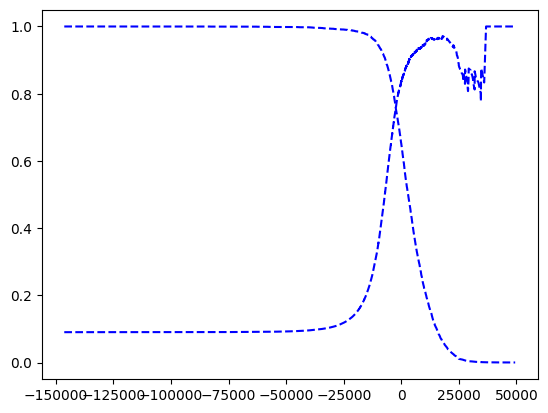

In [44]:

def plot_precision_recall_curve(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], '--b', label='precision' )
    plt.plot(thresholds, recalls[:-1], '--b', label='recall' )

plot_precision_recall_curve(precisions, recalls, thresholds)
plt.show()


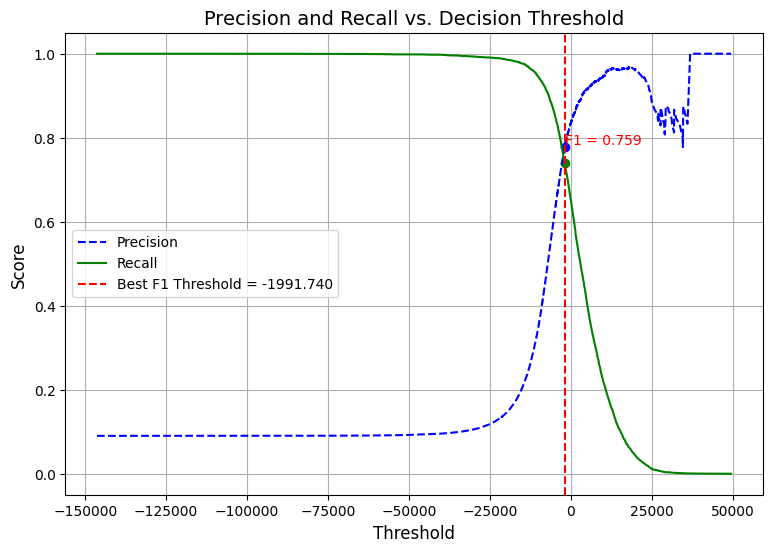

In [46]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    import numpy as np
    import matplotlib.pyplot as plt

    # Calcula F1 para cada threshold (usar precisions[:-1] porque são 1 elemento maiores)
    f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])

    # Encontra o melhor threshold (maior F1)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    best_f1 = f1_scores[best_idx]

    plt.figure(figsize=(9, 6))

    # Curvas de precision e recall
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

    # Linha vertical do melhor threshold
    plt.axvline(best_threshold, color="red", linestyle="--", linewidth=1.5,
                label=f"Best F1 Threshold = {best_threshold:.3f}")

    # Pontos destacados
    plt.scatter(best_threshold, precisions[best_idx], color="blue")
    plt.scatter(best_threshold, recalls[best_idx], color="green")

    # Label do F1
    plt.text(best_threshold,
             max(precisions[best_idx], recalls[best_idx]),
             f"F1 = {best_f1:.3f}",
             color="red",
             fontsize=10,
             ha="left",
             va="bottom")

    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.title("Precision and Recall vs. Decision Threshold", fontsize=14)
    plt.legend()
    plt.grid(True)


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

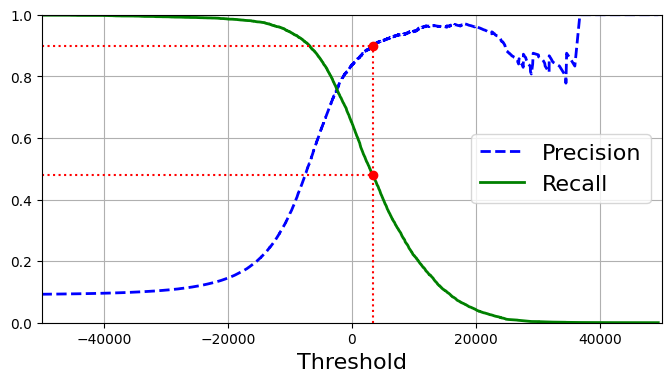

In [49]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

##### Plotando Precision X Recall

In [52]:
# Me retorna o menor threshold para o qual precisions já é maior que 0.9
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

np.float64(3370.0194991439557)

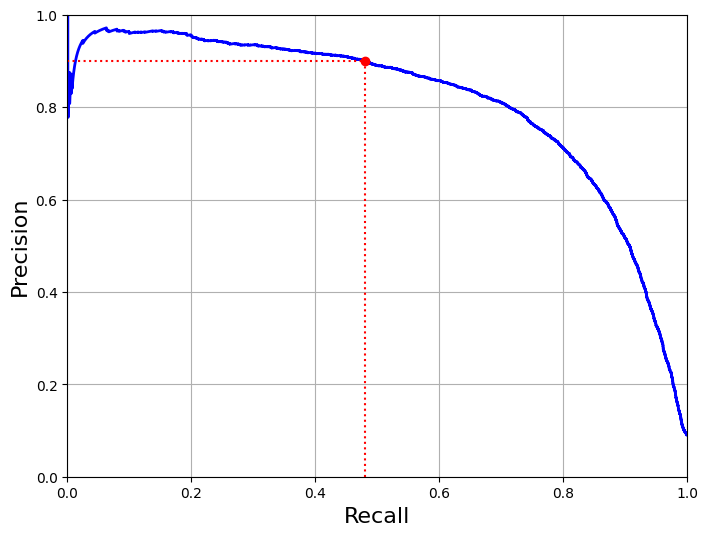

In [50]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [ ]:
# só me retorna os score acima desse threshold para o qual há pelo menos 90% de precisao
y_train_pred_90 = y_scores >= threshold_90_precision

In [55]:
precision_score(y_train_5, y_train_pred_90)

0.9

In [57]:
recall_score(y_train_5, y_train_pred_90)

0.47980077476480354

## Roc curve
receiver operating characteristic (ROC)

- Plota o True positive rate (TP/TP+FN), que é o recall, sobre o False positive rate (FP/FP+TN), que é igual a [1 - True negative rate (TN/FP+TN)]
- True negative rate é chamado de *specificity*
- ROC plota, entao:
    - *sensitivity* (true positive rate - recall): TP/TP+FN
    - 1- [*specificity* (true negative rate)]: FP/TN+FP

In [ ]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


- Quanto maior o Recall (TPR) maior tambem o FPR (Fall Out)
- Quanto mais longe a ROC Curve estiver da linha central:
    - maior o TPR (recall): captura mais os positivos existentes
    - minimiza o FPR: que é o 1 - sensitivity, ou 1 - TN/FP+TN

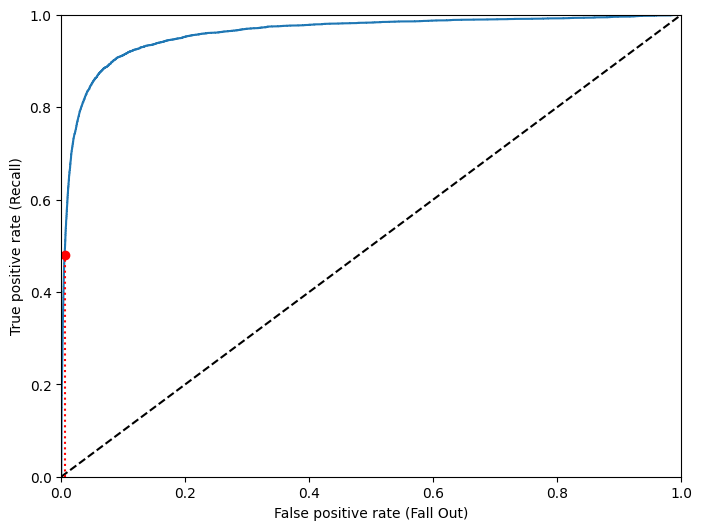

In [73]:
plt.figure(figsize=(8,6))
 
plt.plot(fpr, tpr, label=None)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel("False positive rate (Fall Out)")
plt.ylabel("True positive rate (Recall)")

# * captura o minimo valor de fpr (1- sensitivity), em que tpr (recall) é maior que o 
#   recall correspondente a 90% de precision (TP/TP+FP)
fpr_90 = fpr[np.argmax(tpr>=recall_90_precision)]

plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], 'ro')

### AUC - Area under curve

- é uma forma de calcular o quao boa a estimativa está em comparação com um estimador perfeito
- estimador perfeito: 
    - FPR = 0: ele tera sensitivity igual a 0, ou seja, TN / TN+ FP será igual a 1, pois FP sera igual a 0 
    - TPR = 1: ele conseguira coletar todos os positivos TP/TP+FN, e FN será igual a 0  


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

### AUC ou Precision-Recall Curve | Qual escolher? 

- Revisando:
    - PR Curve: Precision (TP/TP+FP) x Recall (TPR, ou TP/TP+FN). Ilustra o trafe-off, quanto maior a precision, menor a recall (sensitivity)
    - ROC Curve: TPR (Recall) x FPR (Fall Out ou 1-sensitivity) x. Ilustra a evolucao da taxa de captura dos positivos (recall) em relação a taxa de falsos positivos. Esse crescimento se da no sentido inverso do aumento de threshold, ou seja, a taxa de captura dos positivos (Recall) aumenta conforme o threshold diminui. Porem aumenta tambem a taxa de falsos positivos (FP/FP+TN), pois o estimador fica mais frouxo 

- Qual escolher:
    - PR Curve:
        - classe positiva é rara: se a classe positiva é rara, meu TPR (TP/TP+FN) tenderá a ser alto em varios threshold. Afinal, se eu subir muito a barra, ainda assim meu FN seria bem baixo. Meu FPR (1 - sensitiivity, ou 1 - TN/FP+TN, ou FP/TN+FP) tenderá a ser baixo já que a sensitivity será alta devido a muitos TN. Com isso a ROC Curve será muito boa, ainda que o estimador esteja com baixa precision, ou seja, TP/TP+FP
        - false positive precisa ser mais controlado, do que os falsos negativos: o falso positivo impacta diretamente a precision, entrando em seu denominador. Portanto, é um controle claro desse fator. Já os falsos negativos não sã vistos pela precision (TP/TP+FP), apenas pela Recall (TP/TP+FN), em que se tiver muito falso negativo (threshold muito alto), a recall cai bastante
    - ROC Curve:
        - classe positiva nãoé rara: 
        - false positive não precisa ser mais controlado, do que os falsos negativos: 

---------
````CHAT GPT````

Aqui vai uma **versão clara, estruturada, tecnicamente precisa e corrigida** do seu texto — mantendo a ideia, mas ajustando onde havia confusão sobre TPR/FPR em classes raras.


✔️ **Qual curva escolher: PR Curve vs ROC Curve**

**1. Precision–Recall Curve (PR Curve)**

**Use quando:**

✅ **A classe positiva é rara (dataset desbalanceado)**

* Em cenários altamente desbalanceados, a ROC Curve pode ser **enganosamente otimista**.
* Isso ocorre porque o **FPR = FP / (FP + TN)** pode parecer baixo simplesmente porque **TN é muito grande**.
* Assim, mesmo com muitos falsos positivos, o FPR ainda fica próximo de zero → a ROC parece boa, mesmo com um modelo ruim.

✅ **Quando controlar *False Positives* é mais importante**

* A métrica que responde diretamente a FPs é a **Precision = TP / (TP + FP)**.
* Se FP tem impacto crítico (ex.: fraude, triagem médica, modelo de recomendação com custo de irritar usuário), o que importa é:
  **"Quando eu digo que é positivo, quão frequentemente estou certo?"**

**Resumo PR Curve:**

* Mede qualidade da previsão **somente sobre a classe positiva**.
* É sensível a FPs e FNs.
* É a melhor escolha quando o desbalanceamento é grande **ou** quando FPs são críticos.

---

**2. ROC Curve**

**Use quando:**

✅ **A classe positiva NÃO é rara**

* Se as classes têm proporções parecidas, o FPR deixa de ficar “mascarado” e a ROC Curve reflete melhor o trade-off real entre TPR e FPR.

✅ **Quando False Positives não são muito mais importantes do que False Negatives**

* A ROC trata FPR e TPR simetricamente.
* É ideal quando **custo de FP ≈ custo de FN**.

**Resumo ROC Curve:**

* Excelente para comparar classificadores em datasets balanceados.
* Mostra bem o trade-off entre sensibilidade (TPR) e especificidade (1 – FPR).
* Quando classes são balanceadas, o AUC-ROC é estável e interpretável.

---

✔️ Versão final resumida (curta e perfeita para anotações)

**⚪ Use PR Curve quando:**

* A classe positiva é **rara**.
* False Positives são mais caros que False Negatives.
* Você quer medir a performance apenas sobre a classe positiva.

**⚪ Use ROC Curve quando:**

* As classes são **balanceadas**.
* FP e FN têm custos parecidos.
* Você quer uma visão global do trade-off TPR × FPR.

---

Se quiser, posso transformar isso em uma tabela comparativa, bullet points para estudo, ou explicar com exemplos numéricos (fraudes, churn, spam, doença rara).


# Multiclass classification

In [13]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [14]:
sgd_clf.predict(some_digit)

array([3], dtype=uint8)

In [18]:
# o maior score corresponde ao indice da predicao do modelo 
some_digit_scores = sgd_clf.decision_function(some_digit)
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [19]:
np.argmax(some_digit_scores)

np.int64(3)

In [20]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [22]:
sgd_clf.classes_[3]

np.uint8(3)

- o classificador pode ter duas abordagens para uma predicao multiclasse:
    - 1. treina n modelos diferentes, contra n classes, e compara os scores. O score mais alto é a classe escolhida (One versus All)
    - 2. treina n*(n-1)/2 modelos diferentes, com dois identificadores binarios por dataset de treino. A classe que mais ganhar duelos é a classe escolhida (One versus One)
- Por padrao, o scikit-learn adora o One versus All, porem é possivel rodar manualmente o One versus One


In [24]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state =42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict(X_train)

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [25]:
ovo_clf.predict(some_digit)

array([5], dtype=uint8)

In [26]:
cross_val_score(sgd_clf, X_train, y_train, cv=3 ,scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [27]:
cross_val_score(ovo_clf, X_train, y_train, cv=3 ,scoring='accuracy')

array([0.91545, 0.9131 , 0.92045])

**Fazendo Scaling dos dados e analisando impacto sobre acuracia**

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train, y_train,cv=3, scoring= 'accuracy')


array([0.87365, 0.85835, 0.8689 ])

# Error Analysis

In [32]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

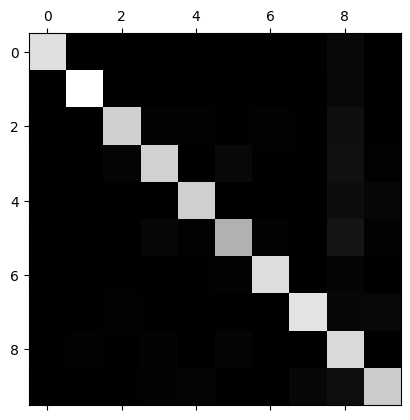

In [33]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [34]:
# * retorna o somatorio de erros cada coluna. Assim, podera ter uma medida normalizada
#   pela classe, de quantos acertos (y_train == y_train_pred) há
row_nums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_nums

In [35]:
row_nums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [36]:
norm_conf_mx

array([[9.41583657e-01, 0.00000000e+00, 3.71433395e-03, 8.44166807e-04,
        1.35066689e-03, 7.25983454e-03, 6.07800101e-03, 1.01300017e-03,
        3.79875063e-02, 1.68833361e-04],
       [0.00000000e+00, 9.49273213e-01, 5.48798576e-03, 3.55977455e-03,
        5.93295758e-04, 6.52625334e-03, 5.93295758e-04, 1.03826758e-03,
        3.14446752e-02, 1.48323939e-03],
       [4.53172205e-03, 4.53172205e-03, 8.76132931e-01, 1.54414233e-02,
        1.22524337e-02, 4.53172205e-03, 1.12453844e-02, 6.04229607e-03,
        6.34441088e-02, 1.84625713e-03],
       [3.58832164e-03, 2.77279400e-03, 1.90833469e-02, 8.52552602e-01,
        3.26211059e-04, 3.31104224e-02, 4.40384929e-03, 6.52422117e-03,
        6.57315283e-02, 1.19067036e-02],
       [2.05409106e-03, 2.39643958e-03, 7.01814447e-03, 1.54056830e-03,
        8.87024991e-01, 2.05409106e-03, 5.81992468e-03, 4.62170490e-03,
        5.93974666e-02, 2.80725779e-02],
       [4.98063088e-03, 2.76701716e-03, 5.53403431e-03, 3.09905921e-02,
   

- As linhas representam as classes verdadeiras
- As colunas representam os erros normalizados pelas quantidades de erros totais da classe predita
    - ou seja, na coluna ele conta os falsos positivos e normaliza pelo total de falsos positivos da coluna
    - esse plot ajuda a decidir em que classe ocorre mais falsos positivos 

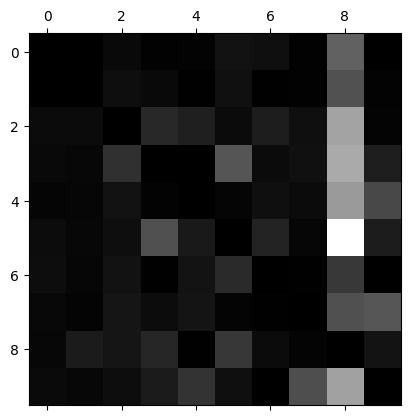

In [37]:
np.fill_diagonal(norm_conf_mx, 0) # preenche com zero a diagonal 
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

# Multilabel classification 

- Na classificação multilabel, o modelo procura predizer a quais classes uma unica instancia pertence
- exemplo do livro: uma imagem contendo varias 3 fotos, e o modelo é treinado para identificar se Maria e Joao aparecem nela. Se sim, o modelo poderia responder algo como [1,0,1], indicando que Maria/Joao aparecem no indice [0] e [2]


In [ ]:
y_train_large = y_train>=7 
y_train_odd = y_train % 2 == 1 # resto da divisao é 1
y_multilabel = np.c_[y_train_large,y_train_odd] # concatena dois arrays pela coluna

In [41]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]], shape=(60000, 2))

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# esta certo: o 5 não é large e o resto da divisao por 2 é 1 (impar)
knn_clf.predict(some_digit)

array([[False,  True]])

## Avaliacao do modelo multilabel

- depende de cada caso
- um exemplo: medir o F1 de cada label e depois fazer um media dessas metricas

In [44]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv =3)
f1_score(y_multilabel, y_train_knn_pred, average= 'macro') #media simples, assume que todas as labels tem mesmo peso 

0.9764102655606048

# Multioutput classification

- Enquanto no multilabel, cada label é uma variavel binaria, aqui no multioutput cada label é uma variavel com multiplas classes
- um exemplo do livro: um modelo pretende limpar uma imagem - ele recebe um array de pixels, sendo que cada pixel tem intensidade definida de 0 a 255. Como output, tem-se os pixels classificados com uma das multiplas labels de 0 a 255

In [ ]:
# cria inteiros randomicos de 0 a 100, com 60k linhas e 784 colunas 
# é o ruido que introduziremos
noise = np.random.randint(0,100, (len(X_train), 784) )

In [48]:
X_train_noise = X_train + noise 

In [54]:
noise_test = np.random.randint(0,100,(len(X_test),784))
X_test_noise = X_test + noise_test


In [51]:
y_train_noise = X_train
y_test_noise = X_test

In [52]:
knn_clf.fit(X_train_noise, y_train_noise)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
X_test_noise.iloc[:1, :]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
60000,25,13,37,0,10,87,39,9,21,15,...,79,67,55,96,83,6,41,78,27,42


In [60]:
pred_multiclass_some_digit = knn_clf.predict(X_test_noise.iloc[:1, :])

In [ ]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

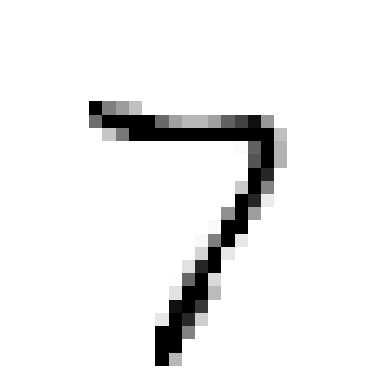

In [61]:
plot_digits(pred_multiclass_some_digit)